# Player evolution prediction

Goal: try to predict which college players will transition best to the NBA

In [1]:
import pandas as pd
import numpy as np
import os
pd.options.display.max_columns = 100
pd.options.display.max_rows = 500

In [2]:
df = pd.read_csv('draft_data_college_history.csv')

In [3]:
df.head()

,draft_year,Pk,Tm,Player,College,Yrs,G,MP,PTS,Conference,Big Six Conference,age,ast,ast_per_g,blk,college_id,fg,fg3,fg3_pct,fg3a,fg_pct,fga,ft,ft_pct,fta,g,mp,mp_per_g,name,orb,pf,pts,pts_per_g,season,stl,tov,trb,trb_per_g
0,2011,1,CLE,Kyrie Irving,Duke,11.0,611.0,20804.0,14089.0,ACC,1,18.0,47.0,4.3,6.0,DUKE,55.0,18.0,0.462,39.0,0.529,104.0,64.0,0.901,71.0,11.0,303.0,27.5,Kyrie Irving,6.0,23.0,192.0,17.5,2010-11,16.0,27.0,37.0,3.4
1,2011,2,MIN,Derrick Williams,Arizona,7.0,428.0,8864.0,3809.0,PAC-12,1,18.0,22.0,0.7,20.0,ARIZONA,162.0,4.0,0.250,16.0,0.574,282.0,158.0,0.681,232.0,31.0,875.0,28.2,Derrick Williams,68.0,78.0,486.0,15.7,2009-10,19.0,60.0,219.0,7.1
2,2011,2,MIN,Derrick Williams,Arizona,7.0,428.0,8864.0,3809.0,PAC-12,1,19.0,43.0,1.1,26.0,ARIZONA,226.0,42.0,0.568,74.0,0.595,380.0,247.0,0.746,331.0,38.0,1141.0,30.0,Derrick Williams,105.0,106.0,741.0,19.5,2010-11,37.0,100.0,314.0,8.3
3,2011,4,CLE,Tristan Thompson,Texas,11.0,730.0,19556.0,6592.0,Big 12,1,19.0,45.0,1.3,86.0,TEXAS,172.0,0.0,0.000,0.0,0.546,315.0,127.0,0.487,261.0,36.0,1104.0,30.7,Tristan Thompson,138.0,100.0,471.0,13.1,2010-11,34.0,64.0,282.0,7.8
4,2011,8,DET,Brandon Knight,Kentucky,9.0,451.0,13202.0,6301.0,SEC,1,19.0,159.0,4.2,8.0,KENTUCKY,217.0,87.0,0.377,231.0,0.423,513.0,136.0,0.795,171.0,38.0,1363.0,35.9,Brandon Knight,25.0,83.0,657.0,17.3,2010-11,25.0,120.0,153.0,4.0


### Model 1

We are going to user info about the player last year in college, if his team is in one of the major conferences (Big Six) and the total seasons in college to try to predict the total of points he will score in hist first NBA season

In [4]:
df2 = df.groupby('Player')['ast_per_g','fg3_pct','ft_pct','g','mp_per_g','pts_per_g','trb_per_g','Conference','Big Six Conference','College'].last()

<ipython-input-4-ca1b576dd6fd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df.groupby('Player')['ast_per_g','fg3_pct','ft_pct','g','mp_per_g','pts_per_g','trb_per_g','Conference','Big Six Conference','College'].last()


In [5]:
df2['college_seasons'] = df.groupby('Player')['season'].count()

In [6]:
df2

,ast_per_g,fg3_pct,ft_pct,g,mp_per_g,pts_per_g,trb_per_g,Conference,Big Six Conference,College,college_seasons
Player,,,,,,,,,,,
A.J. Hammons,1.1,0.545,0.709,33.0,24.6,15.0,8.2,Big Ten,1,Purdue,4
Aaron Gordon,2.0,0.356,0.422,38.0,31.2,12.4,8.0,PAC-12,1,Arizona,1
Aaron Holiday,5.8,0.429,0.828,33.0,37.7,20.3,3.7,PAC-12,1,UCLA,3
Aaron Nesmith,0.9,0.522,0.825,14.0,35.7,23.0,4.9,SEC,1,Vanderbilt,2
Aaron White,1.4,0.356,0.819,34.0,31.5,16.4,7.3,Big Ten,1,Iowa,4
...,...,...,...,...,...,...,...,...,...,...,...
Zach LaVine,1.8,0.375,0.691,37.0,24.4,9.4,2.5,PAC-12,1,UCLA,1
Zeke Nnaji,0.8,0.294,0.760,32.0,30.7,16.1,8.6,PAC-12,1,Arizona,1
Zhaire Smith,1.8,0.450,0.717,37.0,28.4,11.3,5.0,Big 12,1,Texas Tech,1


In [7]:
df_first_year = pd.read_csv('draft_data_first_year_performance.csv')

In [8]:
df_first_year = df_first_year[['g','gs','mp','pts','name']].set_index('name')

In [9]:
df_first_year

,g,gs,mp,pts
name,,,,
Kyrie Irving,51.0,51.0,1558.0,944.0
Derrick Williams,66.0,15.0,1418.0,583.0
Tristan Thompson,60.0,25.0,1424.0,494.0
Brandon Knight,66.0,60.0,2129.0,847.0
Kemba Walker,66.0,25.0,1792.0,799.0
...,...,...,...,...
Charles Bassey,23.0,0.0,168.0,69.0
Sandro Mamukelashvili,41.0,3.0,407.0,154.0
Aaron Wiggins,50.0,35.0,1209.0,416.0


In [10]:
df2 = df2.merge(df_first_year, left_index = True, right_index = True, how = 'inner', suffixes=('_col','_nba'))

In [11]:
df2

,ast_per_g,fg3_pct,ft_pct,g_col,mp_per_g,pts_per_g,trb_per_g,Conference,Big Six Conference,College,college_seasons,g_nba,gs,mp,pts
A.J. Hammons,1.1,0.545,0.709,33.0,24.6,15.0,8.2,Big Ten,1,Purdue,4,22.0,0.0,163.0,48.0
Aaron Gordon,2.0,0.356,0.422,38.0,31.2,12.4,8.0,PAC-12,1,Arizona,1,47.0,8.0,797.0,243.0
Aaron Holiday,5.8,0.429,0.828,33.0,37.7,20.3,3.7,PAC-12,1,UCLA,3,50.0,0.0,646.0,294.0
Aaron Nesmith,0.9,0.522,0.825,14.0,35.7,23.0,4.9,SEC,1,Vanderbilt,2,46.0,1.0,669.0,218.0
Aaron Wiggins,2.5,0.356,0.772,31.0,33.0,14.5,5.8,Big Ten,1,Maryland,3,50.0,35.0,1209.0,416.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach LaVine,1.8,0.375,0.691,37.0,24.4,9.4,2.5,PAC-12,1,UCLA,1,77.0,40.0,1902.0,778.0
Zeke Nnaji,0.8,0.294,0.760,32.0,30.7,16.1,8.6,PAC-12,1,Arizona,1,42.0,1.0,397.0,136.0
Zhaire Smith,1.8,0.450,0.717,37.0,28.4,11.3,5.0,Big 12,1,Texas Tech,1,6.0,2.0,111.0,40.0
Ziaire Williams,2.2,0.291,0.796,20.0,27.9,10.7,4.6,PAC-12,1,Stanford,1,62.0,31.0,1346.0,501.0


In [12]:
X = df2.drop(columns = ['Conference','College','g_nba','gs','mp','pts'])
y = df2.pts

In [13]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [14]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns, index = X.index)
X_scaled = sm.add_constant(X_scaled)

In [15]:
results = sm.OLS(y, X_scaled).fit()

In [16]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    pts   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     9.148
Date:                Mon, 02 May 2022   Prob (F-statistic):           7.42e-13
Time:                        23:58:54   Log-Likelihood:                -3569.8
No. Observations:                 502   AIC:                             7160.
Df Residuals:                     492   BIC:                             7202.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                309.0896     13

### Conclusion 1

We can see that the model in general is not fitting very well the total of points a player will make in his first season. Perhaps we should not approach this problem as a regression, but a classification problem. 

### Model 2
Let's shift this problem into a classification problem and try to predict if a player in its first NBA season will be among the top scorer of that year. First, let's see how many points a top scorer does in one season

In [17]:
season_dict = {}
for file in os.listdir():
    if ('season_1' in file) or ('season_2' in file):
        season_df = pd.read_csv(file)
        season_df['total_pts'] = season_df.G * season_df.PTS
        print('The 70% percentile of the season ' + file.split('_')[1] + '/' + file.split('_')[2].split('.')[0] + f'was {season_df.total_pts.quantile(0.7):.2f}')

The 70% percentile of the season 17/18was 669.16
The 70% percentile of the season 18/19was 689.52
The 70% percentile of the season 19/20was 598.40
The 70% percentile of the season 20/21was 605.16
The 70% percentile of the season 21/22was 609.94


Lets predict wheter a player is among the 30% scorer in its first season. The threshold to indicate if a player succeeded or not will be above 600 points

In [18]:
df2['percentile_70'] = 0
df2.loc[df2.pts > 600,'percentile_70'] = 1

In [19]:
y2 = df2.percentile_70

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.33, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

The model scored a precision of 55.56% when the threshold is 0.4


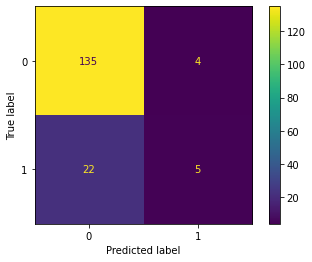

In [25]:
threshold = 0.4
ConfusionMatrixDisplay.from_predictions(y_test,(rfc.predict_proba(X_test)[:,1] > threshold)*1)
tn, fp, fn, tp = confusion_matrix(y_test,(rfc.predict_proba(X_test)[:,1] > threshold)*1).ravel()
precision = tp/(tp+fp)
print(f'The model scored a precision of {precision*100.0:.2f}% when the threshold is {threshold}')

In [26]:
pd.DataFrame(rfc.feature_importances_, index = X.columns, columns = ['Feature Importance']).sort_values(by = 'Feature Importance', ascending = False)

,Feature Importance
mp_per_g,0.146157
pts_per_g,0.138811
trb_per_g,0.134655
ast_per_g,0.129774
ft_pct,0.127639
fg3_pct,0.117366
g_col,0.106363
college_seasons,0.086775
Big Six Conference,0.012461


### Conclusion 2
We can see that with a simple random forest classifier we could achieve a reasonable model. The precision metrics tell us what percentage of the model predictions in fact has become one of the league top 30% scorer on its first season. This model can be improved with more development

As a final act, I'll use this model to make a prediction of the last college season, we are going to make predictions for every player which the team played in the NCAA tournament and has more than 20 games in the last season.

In [27]:
df_college = pd.read_csv('college_2022.csv')

In [28]:
df_college.head()

,name,player_link,school,ast_per_g,fg3_pct,ft_pct,g_col,mp_per_g,n_season,pts_per_g,trb_per_g
0,James Akinjo,/cbb/players/james-akinjo-1.html,Baylor,5.8,0.295,0.835,32,33.1,4.0,13.5,2.8
1,Adam Flagler,/cbb/players/adam-flagler-1.html,Baylor,3.0,0.387,0.741,31,30.7,4.0,13.8,2.2
2,Kendall Brown,/cbb/players/kendall-brown-1.html,Baylor,1.9,0.341,0.689,34,27.0,1.0,9.7,4.9
3,Matthew Mayer,/cbb/players/matthew-mayer-1.html,Baylor,1.0,0.324,0.700,33,22.8,4.0,9.8,5.0
4,Jeremy Sochan,/cbb/players/jeremy-sochan-1.html,Baylor,1.8,0.296,0.589,30,25.1,1.0,9.2,6.4


In [29]:
df_conf = pd.read_csv('College conferences.csv')

In [30]:
df_conf.head()

,School,Conference
0,North Carolina,ACC
1,Duke,ACC
2,NC State,ACC
3,Virginia,ACC
4,Wake Forest,ACC


In [31]:
df_college = df_college.merge(df_conf, how = 'left', left_on = 'school', right_on = 'School').drop(columns = ['School'])

In [32]:
df_college['Big Six Conference'] = 0
df_college.loc[df_college.Conference.notna(),'Big Six Conference'] = 1

In [33]:
df_college = df_college.rename(columns = {'n_season':'college_seasons'})

In [34]:
df_college.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 423
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                424 non-null    object 
 1   player_link         424 non-null    object 
 2   school              424 non-null    object 
 3   ast_per_g           424 non-null    float64
 4   fg3_pct             393 non-null    float64
 5   ft_pct              424 non-null    float64
 6   g_col               424 non-null    int64  
 7   mp_per_g            424 non-null    float64
 8   college_seasons     424 non-null    float64
 9   pts_per_g           424 non-null    float64
 10  trb_per_g           424 non-null    float64
 11  Conference          215 non-null    object 
 12  Big Six Conference  424 non-null    int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 46.4+ KB


In [35]:
X_college = df_college[['ast_per_g', 'fg3_pct', 'ft_pct', 'g_col', 'mp_per_g', 'pts_per_g',
       'trb_per_g', 'Big Six Conference', 'college_seasons']]

In [36]:
X_college.fg3_pct = X_college.fg3_pct.fillna(0)

C:\Users\Gabriel Tutia\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [37]:
df_results = pd.DataFrame(rfc.predict_proba(X_college)[:,1], index = df_college.name, columns=['score'])
df_results['prediction'] = rfc.predict(X_college)


In [38]:
df_results = df_results.merge(df_college.drop(columns = ['player_link']), left_index = True, right_on = 'name').set_index('name')

These are the top 10 players according to the model!

In [39]:
df_results.sort_values(by = 'score', ascending=False).head(10)

,score,prediction,school,ast_per_g,fg3_pct,ft_pct,g_col,mp_per_g,college_seasons,pts_per_g,trb_per_g,Conference,Big Six Conference
name,,,,,,,,,,,,,
Zakai Zeigler,0.54,1,Tennessee,2.7,0.352,0.843,35,22.1,1.0,8.8,1.9,SEC,1
Joe Toussaint,0.52,1,Iowa,3.2,0.257,0.839,36,17.4,3.0,4.3,1.7,Big Ten,1
Tamar Bates,0.50,0,Indiana,0.6,0.298,0.833,32,14.5,1.0,3.9,1.3,Big Ten,1
Augustas Marciulionis,0.50,0,Saint Mary's,1.8,0.183,0.839,34,15.1,1.0,3.1,1.0,NaN,0
Matthew Lee,0.49,0,St. Peter's,2.9,0.337,0.747,30,23.7,3.0,6.8,1.8,NaN,0
Bensley Joseph,0.49,0,Miami (FL),0.8,0.395,0.833,36,13.3,1.0,2.3,1.6,ACC,1
Daimion Collins,0.47,0,Kentucky,0.1,0.000,0.857,27,7.4,1.0,2.9,2.0,SEC,1
Sean Pedulla,0.46,0,Virginia Tech,1.3,0.447,0.900,36,12.9,1.0,5.4,1.2,ACC,1
Ramon Walker Jr.,0.46,0,Houston,0.5,0.274,0.842,28,18.5,1.0,3.2,2.7,NaN,0
